In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

In [2]:
df = pd.read_csv("data/WHR2021.csv", sep='\t', index_col='Country')
df

,Dystopia,Corruption,Generosity,Choices,HealthyLife,Social,GDP,Whisker-high,Whisker-low,Interval
Country,,,,,,,,,,
1. Finland (7.842),3.253,0.481,0.124,0.691,0.741,1.106,1.446,7.904,7.780,7.904
2. Denmark (7.620),2.868,0.485,0.208,0.686,0.763,1.108,1.502,7.687,7.552,7.687
3. Switzerland (7.571),2.839,0.413,0.204,0.653,0.816,1.079,1.566,7.643,7.500,7.643
4. Iceland (7.554),2.967,0.170,0.293,0.698,0.772,1.172,1.482,7.670,7.438,7.670
5. Netherlands (7.464),2.798,0.384,0.302,0.647,0.753,1.079,1.501,7.518,7.410,7.518
...,...,...,...,...,...,...,...,...,...,...
145. Lesotho (3.512)*,1.800,0.015,0.103,0.405,0.007,0.731,0.451,3.748,3.276,3.748
146. Botswana (3.467)*,0.648,0.088,0.027,0.539,0.340,0.724,1.099,3.611,3.322,3.611
147. Rwanda (3.415)*,1.095,0.493,0.227,0.627,0.407,0.202,0.364,3.548,3.282,3.548


In [261]:
X = df.values[:,1:-4]
n = X.shape[1]
print(n)
# print(X)

5


In [262]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, robust_scale

In [263]:
# X = robust_scale(X)

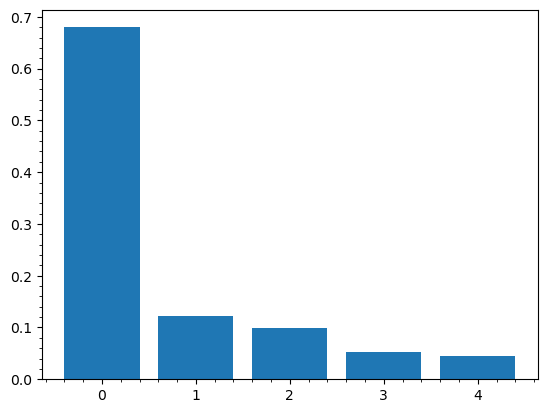

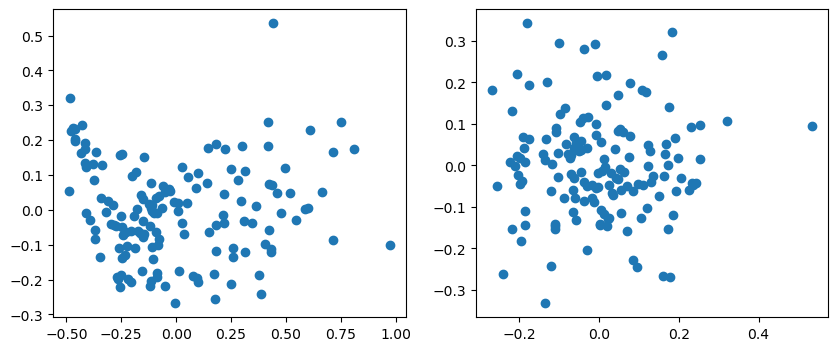

In [264]:
pca_sk = PCA()
pca_sk.fit(X)
U = pca_sk.transform(X)
plt.bar(range(n), pca_sk.explained_variance_ratio_)
plt.minorticks_on()
plt.show()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(U[:,0], U[:,1])
plt.subplot(1,2,2)
plt.scatter(U[:,1], U[:,2])
plt.show()

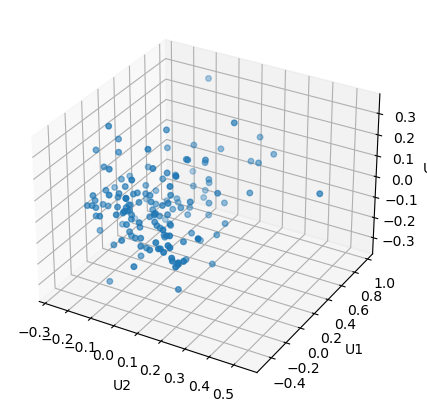

In [265]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(5, 6)
ax.scatter(U[:,1], U[:,0], U[:,2], s=16)
# ax.set(xticklabels=[],
#        yticklabels=[],
#        zticklabels=[])
ax.set_xlabel('U2')
ax.set_ylabel('U1')
ax.set_zlabel('U3')
plt.show()

In [266]:
X0 = X

In [309]:
alpha = 0.6
smooth_quantile = func.QuantileFunc(alpha, func.Sqrt(0.001))
wma = af.averaging_function("WM", rhofunc=smooth_quantile)
amf = af.averaging_function("AM")

[0.13514094 0.17804698 0.49871141 0.52016107 0.79331544]


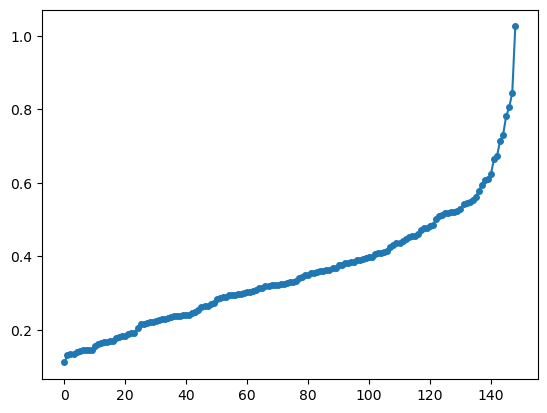

In [310]:
c0 = pca.location(X0)
print(c0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=4)
plt.show()

[0.13638354 0.16446047 0.51280879 0.55836894 0.87236128]


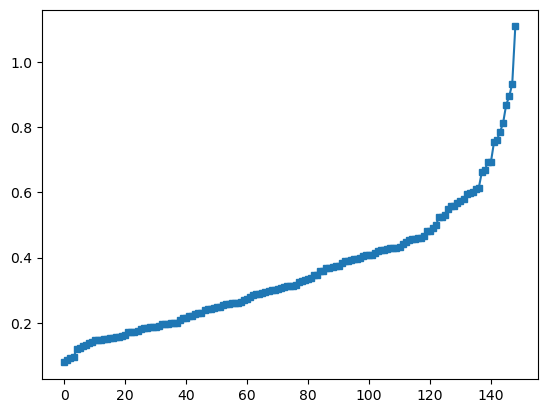

In [311]:
wma = af.averaging_function("WM", rhofunc=smooth_quantile)
c = pca.robust_location(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=4)
plt.show()

In [312]:
X1 = X0 - c
X1_0 = X0 - c0

In [313]:
a1_0, L1_0 = pca.find_pc(X1_0)
print(L1_0, a1_0)

0.10408046843962551 [ 0.12340345 -0.03569691  0.2533101   0.58713306  0.75802776]


In [314]:
wma = af.averaging_function("WM", rhofunc=smooth_quantile)
a1, L1 = pca.find_robust_pc(X1, wma)
print(L1, a1)

0.10153252251881753 [ 0.04237671 -0.08187868  0.17560721  0.70908114  0.67665807]


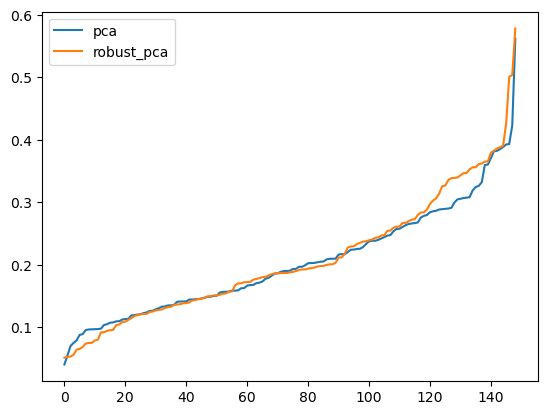

In [315]:
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), label='pca')
plt.plot(sorted(pca.distance_line(X1, a1)), label='robust_pca')
plt.legend()
plt.show()

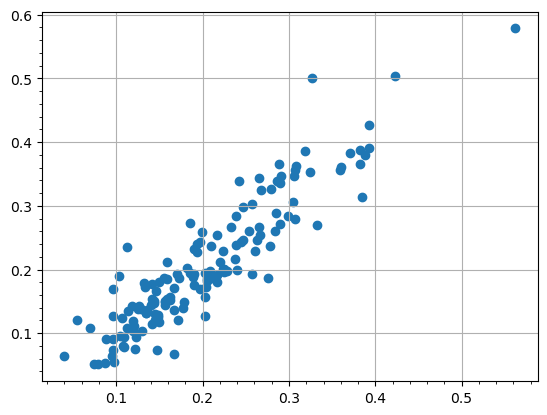

In [316]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [317]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

In [318]:
a2_0, L2_0 = pca.find_pc(X2_0)
print(L2_0, a2_0)

0.01877732151274302 [ 0.59002699  0.3066709   0.54427526  0.24172906 -0.45072453]


In [319]:
wma = af.averaging_function("WM", rhofunc=smooth_quantile)
a2, L2 = pca.find_robust_pc(X2, wma)
print(L2, a2)

0.014851394103134795 [ 0.70064737  0.44359238  0.55031995 -0.04424561 -0.08665646]


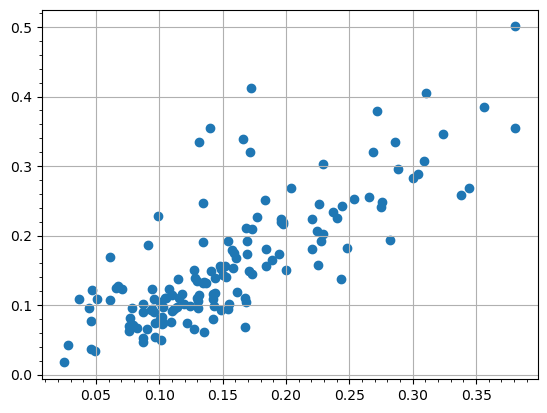

In [320]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

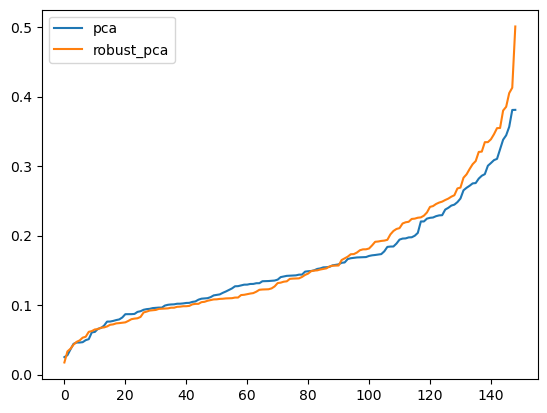

In [321]:
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), label='pca')
plt.plot(sorted(pca.distance_line(X2, a2)), label='robust_pca')
plt.legend()
plt.show()

In [322]:
X3 = pca.project(X2, a2)
X3_0 = pca.project(X2_0, a2_0)

In [323]:
a3_0, L3_0 = pca.find_pc(X3_0)
print(L3_0, a3_0)

0.01518453601159451 [-0.03259953  0.38298836  0.46080251 -0.69038143  0.40409369]


In [324]:
wma = af.averaging_function("WM", rhofunc=smooth_quantile)
a3, L3 = pca.find_robust_pc(X3, wma)
print(L3, a3)

0.012571621520855988 [-0.28144695  0.03280008  0.37465266 -0.64617512  0.60150218]


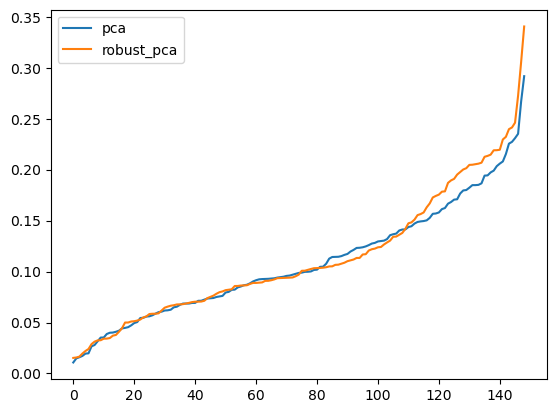

In [325]:
plt.plot(sorted(pca.distance_line(X3_0, a3_0)), label='pca')
plt.plot(sorted(pca.distance_line(X3, a3)), label='robust_pca')
plt.legend()
plt.show()

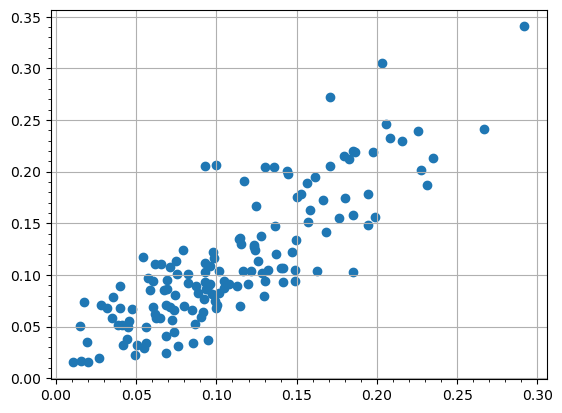

In [326]:
plt.scatter(pca.distance_line(X3_0, a3_0), pca.distance_line(X3, a3))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [327]:
U1_0 = pca.project_line(X1_0, a1_0)
U1 = pca.project_line(X1, a1)
U2_0 = pca.project_line(X1_0, a2_0)
U2 = pca.project_line(X1, a2)
U3_0 = pca.project_line(X1_0, a3_0)
U3 = pca.project_line(X1, a3)

def positive(U):
    if max(U[U>0]) < max(abs(U[U<0])):
        U = -U
    return U

U1 = positive(U1)
U2 = positive(U2)
U3 = positive(U3)
U1_0 = positive(U1_0)
U2_0 = positive(U2_0)
U3_0 = positive(U3_0)


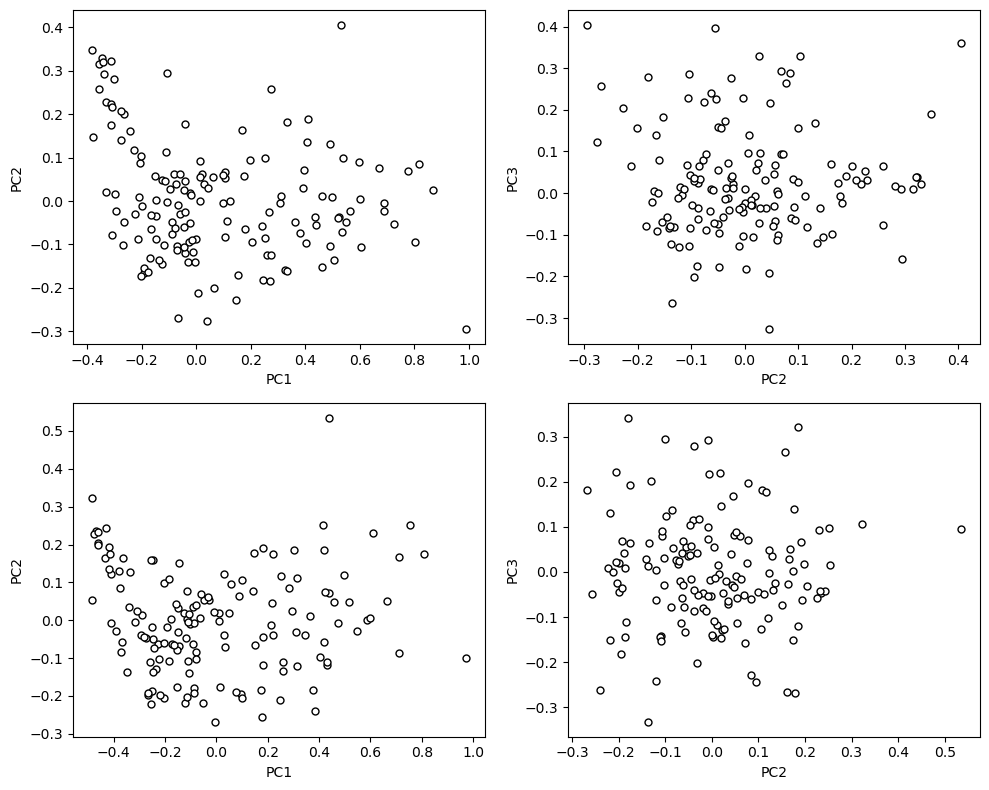

In [328]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.scatter(U1, U2, c='w', edgecolors='k', s=25)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(2,2,2)
plt.scatter(U2, U3, c='w', edgecolors='k', s=25)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.subplot(2,2,3)
plt.scatter(U1_0, U2_0, c='w', edgecolors='k', s=25)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(2,2,4)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.scatter(U2_0, U3_0, c='w', edgecolors='k', s=25)
plt.tight_layout()
plt.savefig('fig/robust_pca_WHR2021.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


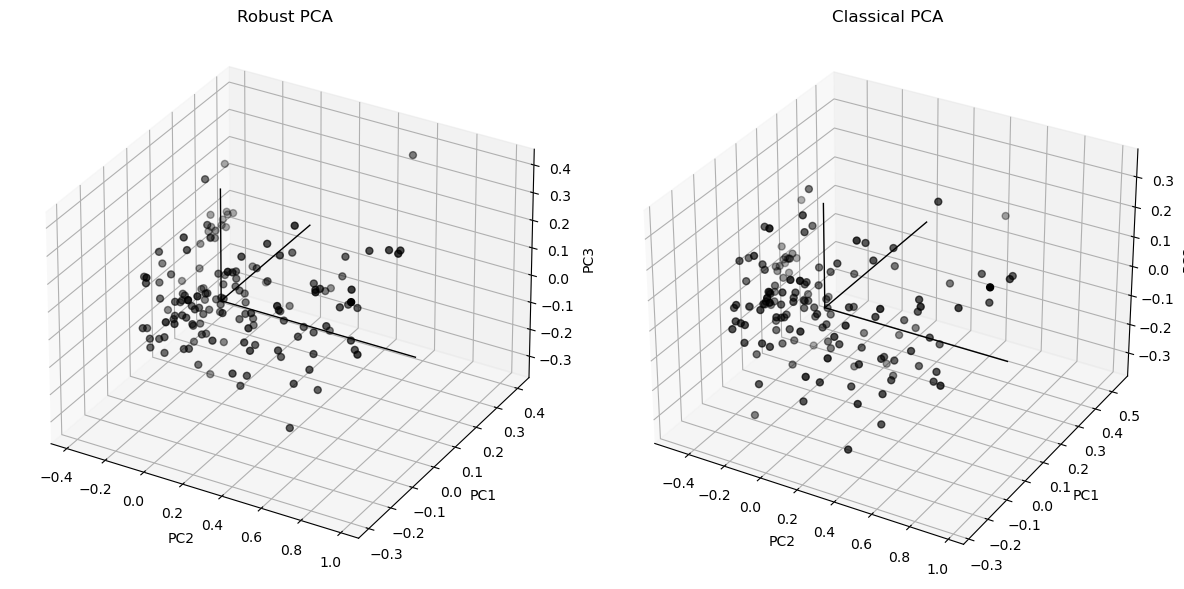

In [329]:
fig, axes = plt.subplots(1, 2, subplot_kw={"projection": "3d"})
fig.set_size_inches(14, 6)
ax1, ax2 = axes
ax1.set_proj_type('persp', 2)
ax1.scatter(U1, U2, U3, s=25, c='k', linewidth=1.0)

ax1.plot([0, 0], [0, U2.max()], [0, 0], color='k', linewidth=1.0)
ax1.plot([0, U1.max()], [0, 0], [0, 0], color='k', linewidth=1.0)
ax1.plot([0, 0], [0, 0], [0, U3.max()], color='k', linewidth=1.0)

# ax1.set_xlim(U1.min(), U1.max())
# ax1.set_ylim(U2.min(), U2.max())
# ax1.set_zlim(U3.min(), U3.max())

ax1.set_xlabel('PC2')
ax1.set_ylabel('PC1')
ax1.set_zlabel('PC3', rotation='vertical')

ax1.set_title('Robust PCA')

ax2.scatter(U1_0, U2_0, U3_0, s=25, c='k', linewidth=1.0)

ax2.plot([0, 0], [0, U2_0.max()], [0, 0], color='k', linewidth=1.0)
ax2.plot([0, U1_0.max()], [0, 0], [0, 0], color='k', linewidth=1.0)
ax2.plot([0, 0], [0, 0], [0, U3_0.max()], color='k', linewidth=1.0)

# ax2.set_xlim(U1_0.min(), U1_0.max())
# ax2.set_ylim(U2_0.min(), U2_0.max())
# ax2.set_zlim(U3_0.min(), U3_0.max())

ax2.set_xlabel('PC2')
ax2.set_ylabel('PC1')
ax2.set_zlabel('PC3', rotation='vertical')

ax2.set_title('Classical PCA')

fig.set_tight_layout(True)

plt.savefig('fig/robust_pca_HTRU_1.eps')

plt.show()